# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm # for colormaps
import pandas as pd
import scipy.optimize as opt
import seaborn as sns


# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
from inauguralproject import HouseholdSpecializationModelClass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

In [25]:
model=HouseholdSpecializationModelClass()

First we create a 3x3 array filled with 0, to build on top of.

In [26]:
HFHM=np.zeros([3,3])

We Define the values of alpha and sigma.

In [27]:
alpha_list = [0.25,0.5,0.75]
sigma_list = [0.5,1,1.5]

In this loop we iterate over the values of alpha and sigma. We set alpha's and sigma's equal to the values in discrete model solution from householdspecialization. Finally we define the HF/HM.

In [28]:
for it, alpha in enumerate(alpha_list):
    for jt, sigma in enumerate(sigma_list):
        model.par.alpha=alpha
        model.par.sigma=sigma
        opt=model.solve_discrete()
        HFHM[it,jt]=opt.HF/opt.HM

We create a meshgrid, where aplha and sigma repressent the x and y values respictively in the following plots.

In [29]:
print(HFHM)
alpha_list,sigma_list = np.meshgrid(alpha_list,sigma_list,indexing='ij')

[[0.54545455 0.30769231 0.21428571]
 [1.         1.         1.        ]
 [1.83333333 3.25       4.66666667]]


We create a 3d plot

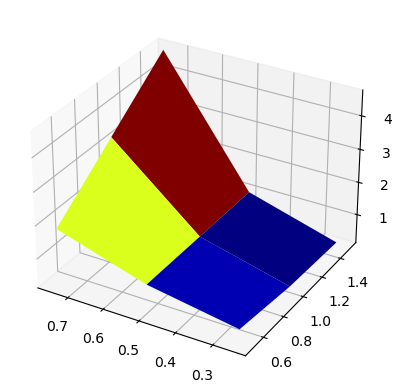

In [30]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')

ax.plot_surface(alpha_list,sigma_list,HFHM,cmap=cm.jet)
ax.invert_xaxis()

# Question 2

We reset model paramaters from q1

In [31]:
model.par.sigma =1
model.par.alpha =0.5

We define the 5 values that WF can take

In [32]:
model.par.wF_vec

array([0.8, 0.9, 1. , 1.1, 1.2])

Log transformation. WM is normalized to 1.

In [33]:
logWF = np.log(model.par.wF_vec)

We create another array filled with 0, which will be filled in in the next loop.

In [34]:
logHFHM = np.zeros(model.par.wF_vec.size)

Basically the same operation as in the q1 loop.

In [35]:
for it, wf in enumerate(model.par.wF_vec):
    model.par.wF = wf
    opt = model.solve_discrete()
    logHFHM[it] = np.log(opt.HF / opt.HM)


Finally, we make the plot

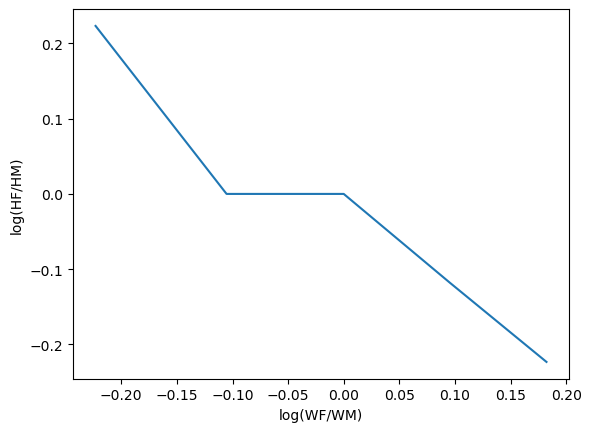

In [36]:
plt.plot(logWF, logHFHM)
plt.xlabel('log(WF/WM)')
plt.ylabel('log(HF/HM)')
plt.show()

# Question 3

Explain your code and procedure

In [37]:
model.par.alpha = 0.5
model.par.sigma = 1

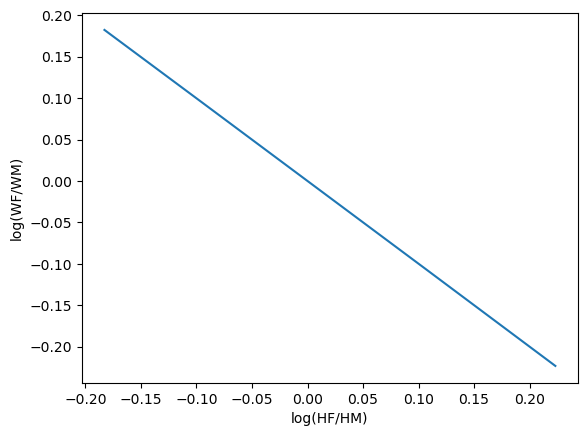

In [38]:
#we import the mathplot to allow for continous variables

model.solve_wF_vec()
WF_list = [0.8, 0.9, 1, 1.1, 1.2]
logWF = np.log(WF_list)
logHFHM=np.log(model.sol.HF_vec/model.sol.HM_vec)
plt.plot(logHFHM, logWF)
plt.ylabel('log(WF/WM)')
plt.xlabel('log(HF/HM)')
plt.show()

We find a similar relationship between wagegap and housework as in question 3, but we see a more a clear correlation, without the "kink" witnessed in the graph for Q3.

# Question 4

In [39]:
# %debug
alpha_est, sigma_est = model.estimate()
#provide estimates for alpha and sigma, utilising estimate. 
print('alpha = ', alpha_est, 'sigma = ', sigma_est)

alpha =  0.9820790181235084 sigma =  0.0999335358060506


In [40]:


#Set up data
w_F = np.array([0.8, 0.9, 1.0, 1.1, 1.2])
w_M = np.ones(5)
data = pd.DataFrame({'w_F': w_F, 'w_M': w_M, 'logHFHM': logHFHM})


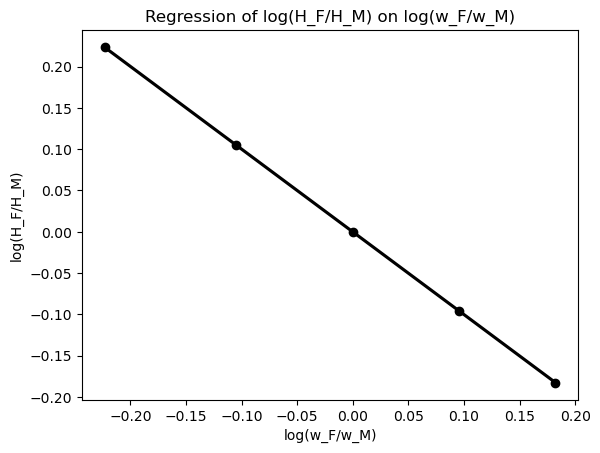

In [41]:
plt.scatter(x=np.log(w_F/w_M), y=logHFHM, color='black')
sns.regplot(x=np.log(w_F/w_M), y=logHFHM, scatter=False, color='black')

#could not get the following to work
#for i in range(5):
#    sns.regplot(x=np.log(w_F[i]/w_M[i]), y=data.loc[data['w_F']==w_F[i], 'logHFHM'], scatter=False, color='blue')

plt.xlabel('log(w_F/w_M)')
plt.ylabel('log(H_F/H_M)')
plt.title('Regression of log(H_F/H_M) on log(w_F/w_M)')
plt.show()    

The data points and fitted model for the ideal alpha and sigma values are displayed in the ensuing figure. A higher wage ratio results in a smaller time ratio, which indicates greater specialization in the labor market. This relationship between the wage ratio of men and women (wF/wM) and the time ratio of women to men (HF/HM) is captured by the model, according to an economic interpretation. The best fit of the model to the data is represented by the ideal alpha and sigma values, which can be used to calculate the predicted time ratio for a particular wage ratio.

# Question 5

We changed the formula to allow for different values of $\epsilon$ or $\nu$. 
For the sake of demonstration, we set the following paramters:

We set $\epsilon_M$ for men to 1.5 and $\epsilon_F$ for women to 0.5. 
The higher value of $\epsilon$ for men (compared to women) hypothetically assumes that men are less willing to give up leisure time in order to increase consumption, while women are more willing to do so.

We set $\nu_M$ for men to 0.01 and $\nu_F$ for women to 0.001. 
This hypothetically implies that men are more averse to spending time on household production, and are willing to pay more to avoid it, relative to women.


In [42]:
from inauguralproject2 import HouseholdSpecializationModelClass
model=HouseholdSpecializationModelClass()

In [43]:
nu_M, nu_F, sigma_est, epsilon_M, epsilon_F = model.estimate()
# %debug
print('nu_M = ', nu_M, 'nu_F = ', nu_F, 'sigma = ', sigma_est, 'eps_M', epsilon_M, 'eps_F', epsilon_F)

#previous answer (Q4) sigma =  0.0999335358060506


nu_M =  0.001024134135154237 nu_F =  0.0011474697906202658 sigma =  0.09851494467198278 eps_M 1.2567302704269743 eps_F 1.1589683236706767


We see that men have slightly less disutility of work compared to women. So men are less willing to give up leisure time in order to increase consumption, while women are more willing to do so.


In [44]:
model.sol
idx = 4

In [45]:
model.calc_utility(model.sol.LM_vec[idx], 
                   model.sol.HM_vec[idx],
                   model.sol.LF_vec[idx],
                   model.sol.HF_vec[idx])

-0.21500921224110547

Theoretically, for $alpha = 0.5$, allowing for different values of $epsilon$ or $nu$ for men and women might help to match the data because it would account for gender differences in the disutility from working and/or the value of time spent on household production.

Women may choose to work less in the market and spend more time on household production if they have a higher disutility from working (i.e., a higher value of $nu$ or $epsilon$) or if their time spent on household production is more valuable (i.e., a lower value of $epsilon$). This would be consistent with empirical evidence on gender differences in time use.